In [1]:
# Plot images with bounding boxes from YOLO files to make sure coordinates are correct

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

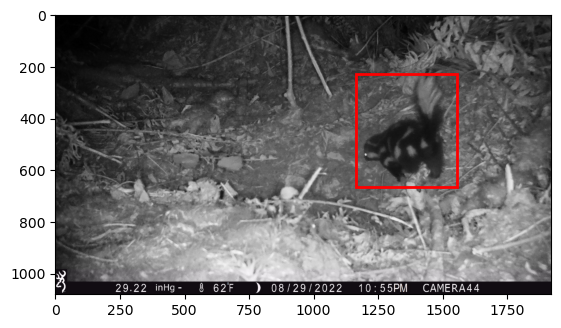

In [8]:
# A simple way

#specify path to the image
#image_path = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/both/data/ORSNAP/hailey.hester-ORSNAP_Weasel/images/ORSNAP01__2020-09-14__04-28-11(2)_ax.JPG'
#image_path = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/both/data/COA_2021/cappel_COA-COA_2021_Cougar_1_AM/images/23336-3__23336-3-T__2021-04-17__10-10-30(3)_do.JPG'
image_path = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/both/data/ESF_TRAIL/ESF_TRAIL_SpottedSkunk/images/18806C_trail_0178_bv.JPG'

# Finds the corresponding YOLO file
yolo_txt_path = image_path.replace("/images/", "/labels/").replace(".JPG", ".txt")

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)

# Load bounding box coordinates from YOLO .txt file
with open(yolo_txt_path, 'r') as f:
    bbox_info = f.readline().strip().split()
    class_id, x_center, y_center, width, height = map(float, bbox_info)

# Convert YOLO format to corner coordinates
x_min = (x_center - width / 2) * image.width
y_min = (y_center - height / 2) * image.height
x_max = (x_center + width / 2) * image.width
y_max = (y_center + height / 2) * image.height

# Create a rectangle patch for bounding box
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
plt.gca().add_patch(rect)

# Show the image with bounding box
plt.show()


box_data: 34.0000 0.7079 0.4113 0.2045 0.4056

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [32 32 32]
  [32 32 32]
  [31 31 31]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [31 31 31]
  [30 30 30]
  [30 30 30]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [34 34 34]
  [31 31 31]
  [31 31 31]]

 ...

 [[17 12 18]
  [17 12 18]
  [17 12 18]
  ...
  [17 12 18]
  [17 12 18]
  [17 12 18]]

 [[17 12 18]
  [17 12 18]
  [17 12 18]
  ...
  [17 12 18]
  [17 12 18]
  [17 12 18]]

 [[17 12 18]
  [17 12 18]
  [17 12 18]
  ...
  [17 12 18]
  [17 12 18]
  [17 12 18]]]


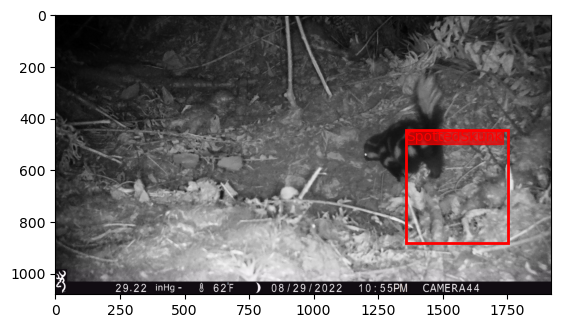

In [11]:
# A more complicated way to show class labels (**Conversion to box dimensions is wrong here**)

def plot_image_with_boxes(image_path, yolo_data, class_mapping):

    image = plt.imread(image_path)
    plt.imshow(image)
    ax = plt.gca()
    
    with open(yolo_file_path, 'r') as yolo_file:
        yolo_data = yolo_file.readlines()

    for box_data in yolo_data:
        print("box_data:", box_data)  # Add this line to print the box_data
  
        class_id, x, y, w, h = map(float, box_data.split())
        class_id = int(class_id)

        print(image)
        
        class_label = class_mapping[class_id]
        box_x = x * image.shape[1]
        box_y = y * image.shape[0]
        box_width = w * image.shape[1]
        box_height = h * image.shape[0]
        
        rect = patches.Rectangle(
            (box_x, box_y), box_width, box_height,
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            box_x, box_y, class_label,
            color='red', verticalalignment='top',
            bbox={'color': 'red', 'alpha': 0.7, 'pad': 0}
        )

    plt.show()

# Choose an image to visualize
image_path = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/both/data/ESF_TRAIL/ESF_TRAIL_SpottedSkunk/images/18806C_trail_0178_bv.JPG'
#image_path = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/both/data/ESF_GROUND/hailey.hester-ESF_GROUND_Weasel/images/18907D_small_0153_cy.JPG'

# Finds the corresponding YOLO file
yolo_file_path = image_path.replace("/images/", "/labels/").replace(".JPG", ".txt")

# Set classes with IDs
class_mapping = {
  1: 'CanadaJay',
  2: 'Coyote',
  3: 'PileatedWoodpecker',
  4: 'Owl',
  5: 'Mink',
  6: 'RedFox',
  7: 'Marten',
  8: 'AmericanRobin',
  9: 'DouglasSquirrel',
  10: 'FlyingSquirrel',
  11: 'Grouse',
  12: 'Invertebrate',
  13: 'MountainBeaver',
  14: 'OtherBird',
  15: 'SmallMammal',
  16: 'Warbler',
  17: 'Chickadee',
  18: 'MountainQuail',
  19: 'StripedSkunk',
  20: 'Human',
  21: 'Dog',
  22: 'BlackBear',
  23: 'BlackTailedDeer',
  24: 'Bobcat',
  25: 'Cougar',
  26: 'DarkEyedJunco',
  27: 'GraySquirrel',
  28: 'Herp',
  29: 'NorthernFlicker',
  30: 'Opossum',
  31: 'Rabbit',
  32: 'Racoon',
  33: 'RooseveltElk',
  34: 'SpottedSkunk',
  35: 'StellersJay',
  36: 'Thrush',
  37: 'TownsendsChipmunk',
  38: 'VariedThrush',
  39: 'Weasel',
  40: 'Woodpecker',
  41: 'Woodrat',
  42: 'Wren',
  43: 'GroundSquirrel',
  44: 'GrayFox'
}

# Plot the image with bounding boxes and class labels
plot_image_with_boxes(image_path, yolo_file_path, class_mapping)


In [ ]:
#set directories
base_dir = "/mnt/ssd-cluster/cara/upload_ground_thresh620/data/"
project = "COA_2021/AmericanRobin_1AM"

In [ ]:
#iterate through
image_dir = os.path.join(base_dir, project, "images")
txt_dir = os.path.join(base_dir, project, "labels")

image_files = [file for file in os.listdir(image_dir) if file.lower().endswith(".jpg")]

print(image_files)

In [ ]:
def parse_yolo_bbox(bbox_line, image_width, image_height):
    data = bbox_line.split()
    class_id = int(data[0])
    x_center = float(data[1])
    y_center = float(data[2])
    width = float(data[3])
    height = float(data[4])

    x_min = int((x_center - width / 2) * image_width)
    y_min = int((y_center - height / 2) * image_height)
    x_max = int((x_center + width / 2) * image_width)
    y_max = int((y_center + height / 2) * image_height)

    return class_id, x_min, y_min, x_max, y_max


In [ ]:

#could I input a .txt file or .yolo or something here?
#e.g., once I have dataframe of true pos/neg I can sort and view this way
#figure out how to make grids

image_files = ["oregon_critters/data/COA_2021/AmericanRobin_1AM/images/21189-4__21189-4-G__2021-05-01__08-27-44(1)_eg.JPG", 
               "oregon_critters/data/COA_2021/AmericanRobin_1AM/images/22579-1__22579-1-G__2021-03-11__11-20-57(3)_eg.JPG", 
               "oregon_critters/data/COA_2021/AmericanRobin_1AM/images/23343-1__23343-1-G__2021-05-25__20-17-30(2)_eg.JPG"]  # Add the filenames you want to visualize

for image_file in image_files:
    image_path = os.path("/mnt/ssd-cluster/cara/upload_ground_thresh620/data/COA_2021/AmericanRobin_1AM/images/21189-4__21189-4-G__2021-05-01__08-27-44(1)_eg.JPG")
    #image_path = os.path.join(image_dir, image_file)
    txt_path = os.path("/mnt/ssd-cluster/cara/upload_ground_thresh620/data/COA_2021/AmericanRobin_1AM/images/21189-4__21189-4-G__2021-05-01__08-27-44(1)_eg.txt")
    #txt_path = os.path.join(txt_dir, image_file.replace(".jpg", ".txt"))


    if os.path.exists(txt_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        with open(txt_path, "r") as txt_file:
            lines = txt_file.readlines()

        for line in lines:
            class_id, x_min, y_min, x_max, y_max = parse_yolo_bbox(line, image.shape[1], image.shape[0])
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis("off")
        plt.title(image_file) 
        plt.show()
